# Analysis of LL Pipeline Differential Against Ground Truth
Let's first load the data.

In [6]:
import pandas as pd

data_path = "/Users/neo/Documents/DATA/pooled_results.csv"

df = pd.read_csv(data_path)

## Dot & Identity Line Plots
Plotting a 2D dot plot for any two columns and the identity line y=x.

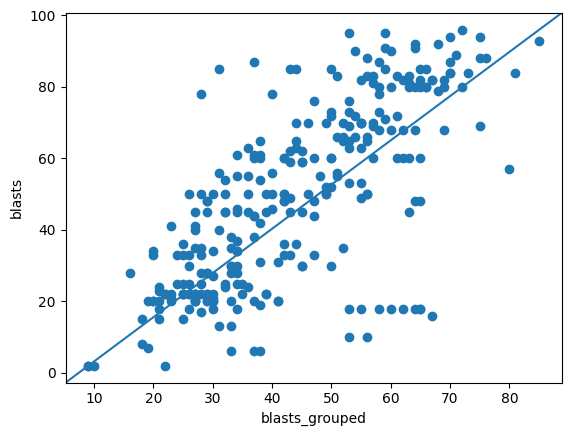

In [7]:
def dot_and_identity_line(column_1, column_2):
    """Plot a scatter plot of two columns in df with a line of y=x."""
    import matplotlib.pyplot as plt

    plt.scatter(df[column_1], df[column_2])
    plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes)
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()

dot_and_identity_line("blasts_grouped", "blasts")

## Dot and LR Plot
Make a dot plot and run a linear regression line through the dot plot.

Number of rows removed:  0
Total number of rows:  310


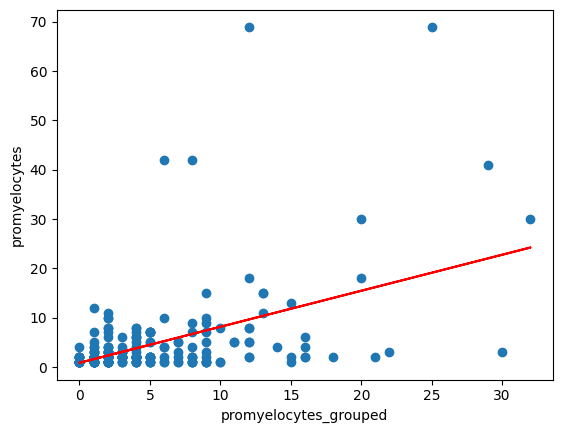

Slope:  0.7303813429730314
Intercept:  0.854488275433309


In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


def dot_and_linear_regression(column_1, column_2, intercept=False):
    """Plot a scatter plot of two columns in df with a linear regression line.
    Convention, column_1 will always be multiplied by 100.
    If intercept is True, the line will have an intercept. Else, the line must pass through the origin.
    """

    # first create new_df with only the two columns and drop any rows with NaN values and print the number of rows removed
    new_df = df[[column_1, column_2]]

    # print the number of rows removed and total number of rows
    print("Number of rows removed: ", len(df) - len(new_df))
    print("Total number of rows: ", len(df))

    # drop any rows with NaN values
    new_df = new_df.dropna()

    X = new_df[[column_1]]
    y = new_df[column_2]

    model = LinearRegression(fit_intercept=intercept)
    model.fit(X, y)

    plt.scatter(new_df[column_1], new_df[column_2])
    plt.plot(new_df[column_1], model.predict(X), color="red")
    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.show()

    # print the slope and intercept of the line
    print("Slope: ", model.coef_[0])
    if intercept:
        print("Intercept: ", model.intercept_)
    else:
        print("Intercept: Turned off")


dot_and_linear_regression("promyelocytes_grouped", "promyelocytes", intercept=True)